[Reference](https://levelup.gitconnected.com/scikit-learn-python-6-useful-tricks-for-data-scientists-1a0a502a6aa3)

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=10, n_features=4, n_classes=2, random_state=123)

In [6]:
pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])

,Feature_1,Feature_2,Feature_3,Feature_4
0,-0.525038,-0.891119,-1.713221,1.315132
1,0.350666,0.780601,1.892239,-1.453395
2,-0.128317,-0.408917,-1.189686,0.914115
3,1.422256,1.031467,-0.935643,0.724513
4,-1.043645,-1.322303,-1.594203,1.221731
5,0.794175,0.935251,0.926843,-0.709606
6,-0.773266,-0.353686,1.344147,-1.036172
7,-0.992341,-0.860456,0.084953,-0.068954
8,-0.152253,0.411750,2.206481,-1.696821
9,-1.543099,-1.470873,-0.403813,0.304769


In [7]:
pd.DataFrame(y, columns=['Label'])

,Label
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,0


In [10]:
X = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])

In [11]:
print(X.iloc[1,2])

1.8922386670369293


In [12]:
X.iloc[1, 2] = float('NaN')
X

,Feature_1,Feature_2,Feature_3,Feature_4
0,-0.525038,-0.891119,-1.713221,1.315132
1,0.350666,0.780601,NaN,-1.453395
2,-0.128317,-0.408917,-1.189686,0.914115
3,1.422256,1.031467,-0.935643,0.724513
4,-1.043645,-1.322303,-1.594203,1.221731
5,0.794175,0.935251,0.926843,-0.709606
6,-0.773266,-0.353686,1.344147,-1.036172
7,-0.992341,-0.860456,0.084953,-0.068954
8,-0.152253,0.411750,2.206481,-1.696821
9,-1.543099,-1.470873,-0.403813,0.304769


In [13]:
imputer_simple = SimpleImputer()

pd.DataFrame(imputer_simple.fit_transform(X))

,0,1,2,3
0,-0.525038,-0.891119,-1.713221,1.315132
1,0.350666,0.780601,-0.141571,-1.453395
2,-0.128317,-0.408917,-1.189686,0.914115
3,1.422256,1.031467,-0.935643,0.724513
4,-1.043645,-1.322303,-1.594203,1.221731
5,0.794175,0.935251,0.926843,-0.709606
6,-0.773266,-0.353686,1.344147,-1.036172
7,-0.992341,-0.860456,0.084953,-0.068954
8,-0.152253,0.411750,2.206481,-1.696821
9,-1.543099,-1.470873,-0.403813,0.304769


In [14]:
imputer_KNN = KNNImputer(n_neighbors=2, weights="uniform")

pd.DataFrame(imputer_KNN.fit_transform(X))

,0,1,2,3
0,-0.525038,-0.891119,-1.713221,1.315132
1,0.350666,0.780601,1.566662,-1.453395
2,-0.128317,-0.408917,-1.189686,0.914115
3,1.422256,1.031467,-0.935643,0.724513
4,-1.043645,-1.322303,-1.594203,1.221731
5,0.794175,0.935251,0.926843,-0.709606
6,-0.773266,-0.353686,1.344147,-1.036172
7,-0.992341,-0.860456,0.084953,-0.068954
8,-0.152253,0.411750,2.206481,-1.696821
9,-1.543099,-1.470873,-0.403813,0.304769


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=25, n_features=4, n_classes=2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

In [18]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

pd.DataFrame({'Prediction': y_pred, 'True': y_test})

,Prediction,True
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1


In [20]:
import joblib

joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

In [23]:
new_pipe = joblib.load('./pipe.joblib')

new_pipe.predict(X_test)

array([0, 0, 1, 1, 0])

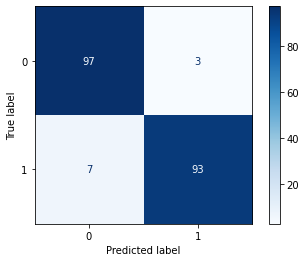

In [25]:
from sklearn.metrics import plot_confusion_matrix

X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = LogisticRegression()

clf.fit(X_train, y_train)

confmat = plot_confusion_matrix(clf, X_test, y_test, cmap="Blues")

[Text(174.67826086956524, 201.90857142857143, 'X[0] <= -0.135\ngini = 0.5\nsamples = 800\nvalue = [400, 400]'),
 Text(109.17391304347827, 170.84571428571428, 'X[2] <= 0.923\ngini = 0.09\nsamples = 401\nvalue = [382, 19]'),
 Text(94.61739130434783, 139.78285714285715, 'X[2] <= 0.765\ngini = 0.015\nsamples = 385\nvalue = [382, 3]'),
 Text(58.22608695652174, 108.72, 'X[2] <= -0.993\ngini = 0.01\nsamples = 381\nvalue = [379, 2]'),
 Text(29.11304347826087, 77.65714285714284, 'X[2] <= -0.996\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(14.556521739130435, 46.59428571428572, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(43.66956521739131, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(87.33913043478262, 77.65714285714284, 'X[3] <= -0.777\ngini = 0.006\nsamples = 330\nvalue = [329, 1]'),
 Text(72.78260869565217, 46.59428571428572, 'X[3] <= -0.78\ngini = 0.022\nsamples = 88\nvalue = [87, 1]'),
 Text(58.22608695652174, 15.531428571428563, 'gini = 0.0\nsamples

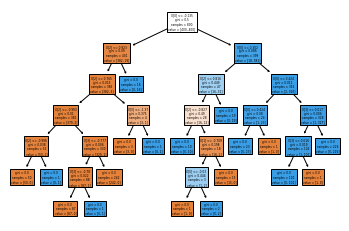

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

plot_tree(clf, filled=True)